In [ ]:
import pandas as pd
import numpy as np
#pd.set_option('display.max_rows', 10000)
#pd.set_option('display.max_columns', 14) 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
df_churn = pd.read_csv('churn - Copia.csv', index_col = 'RowNumber', sep=',')

In [ ]:
# informações sobre a tabela
df_churn.info()
# exposição das cinco primeiras linhas da tabela 
df_churn.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# identifica e soma os valores duplicados
df_churn.duplicated().sum()

0

In [ ]:
# identifica e soma os valores duplicados por coluna
df_churn.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Contando os valores de uma coluna
df_churn.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df_churn.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df_churn.groupby(['Exited']).Gender.value_counts()

Exited  Gender
0       Male      4559
        Female    3404
1       Female    1139
        Male       898
Name: Gender, dtype: int64

In [ ]:
# Deletando colunas de identificação (que não apresentam dados relevantes(qualitativos ou quantitativos))
arr_delete = ['CustomerId', 'Surname']
df_churn.drop(arr_delete, axis=1, inplace = True)
df_churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [ ]:
# Separando as Features qualitativas das quantitativas
arr_quali = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
arr_quanti = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']

#loc
#filter

df_churn_quali = df_churn[arr_quali]
df_churn_quanti = df_churn[arr_quanti]

In [ ]:
# Nas Features quantitativas fazer os estudos estatísticos para compreender a distribuição dos dados
df_churn_quanti.describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,650.53,38.92,5.01,76485.89,1.53,100090.24,0.2
std,96.65,10.49,2.89,62397.41,0.58,57510.49,0.4
min,350.00,18.00,0.00,0.00,1.00,11.58,0.0
25%,584.00,32.00,3.00,0.00,1.00,51002.11,0.0
50%,652.00,37.00,5.00,97198.54,1.00,100193.92,0.0
75%,718.00,44.00,7.00,127644.24,2.00,149388.25,0.0
max,850.00,92.00,10.00,250898.09,4.00,199992.48,1.0


In [ ]:
# Nas Features qualitativas fazer o estudo de distribuição das classes


In [ ]:
# Selecionando linhas e colunas com Loc
df_gender_exited = df_churn.loc[(df_churn.Exited == 1), ['Gender', 'Exited']]
df_geography_exited = df_churn.loc[(df_churn.Exited == 1), ['Geography', 'Exited']]
df_age_exited = df_churn.loc[(df_churn.Exited == 1), ['Age', 'Exited']]
df_creditscore_exited = df_churn.loc[(df_churn.Exited == 1), ['CreditScore', 'Exited']]
df_tenure_exited = df_churn.loc[(df_churn.Exited == 1), ['Tenure', 'Exited']]
df_balance_exited = df_churn.loc[(df_churn.Exited == 1), ['Balance', 'Exited']]
df_numofproducts_exited = df_churn.loc[(df_churn.Exited == 1), ['NumOfProducts', 'Exited']]
df_hascrcard_exited = df_churn.loc[(df_churn.Exited == 1), ['HasCrCard', 'Exited']]
df_isactivemember_exited = df_churn.loc[(df_churn.Exited == 1), ['IsActiveMember', 'Exited']]
df_estimatedsalary_exited =df_churn.loc[(df_churn.Exited == 1), ['EstimatedSalary', 'Exited']]

In [ ]:
df_churn.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df_gender_exited.value_counts()

Gender  Exited
Female  1         1139
Male    1          898
dtype: int64

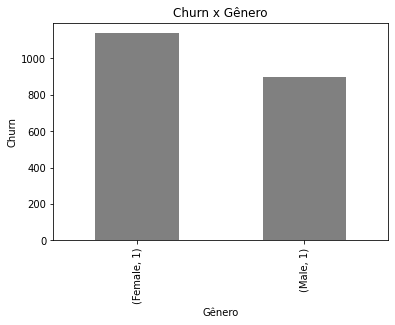

In [ ]:
df_gender_exited.value_counts().plot(x='Gender', title='Churn x Gênero',ylabel='Churn', xlabel='Gênero',color='grey', kind='bar')


In [ ]:
df_churn.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df_geography_exited.value_counts()

Geography  Exited
Germany    1         814
France     1         810
Spain      1         413
dtype: int64

In [ ]:
df_churn.value_counts().plot(x='Geography', title='Churn x Geography',ylabel='Churn', xlabel='Geography', color='grey', kind='bar')

NameError: ignored

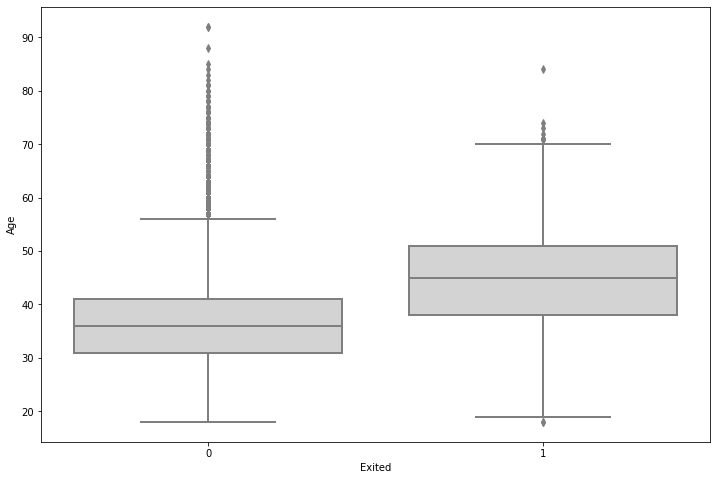

In [ ]:
sns.boxplot(data=df_churn, x='Exited', y='Age', fliersize=5, width=0.8, linewidth=2, color='lightgrey').figure.set_size_inches(12, 8)

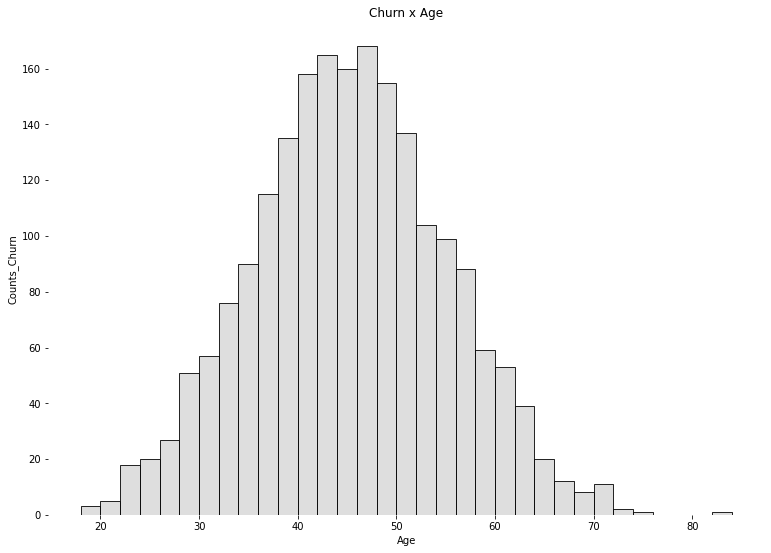

In [ ]:
sns.displot(
    data=df_age_exited, x='Age', color='lightgrey').despine(
        bottom=True, left=True, right=True, top=True).set(
            ylabel=('Counts_Churn'), xlabel=('Age'), title=('Churn x Age')).figure.set_size_inches(12, 8)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


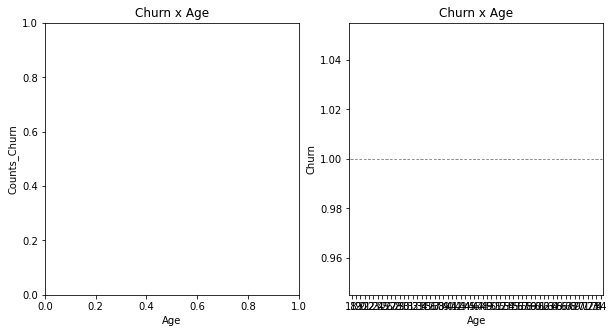

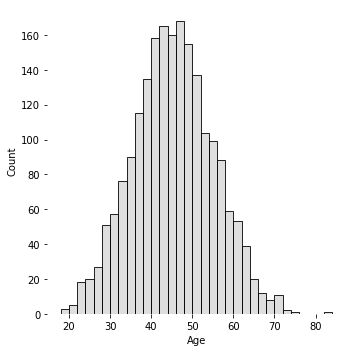

In [ ]:
# Unpacking method
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
#fig.tight_layout(pad=3)

# Grafico 1
sns.displot(
        data=df_age_exited
        , x='Age'
        , color='lightgrey'
        , ax=ax1
)
ax1.set(
    ylabel = ('Counts_Churn')
    , xlabel = ('Age')
    , title = ('Churn x Age')
)

# Grafico 2
sns.boxplot(
        data=df_age_exited
        , x='Age'
        , y='Exited'
        , fliersize=0.5
        , width = 0.5
        , linewidth=0.5
        , palette=sns.color_palette(['lightgrey'])
        , ax=ax2
)
ax2.set(
    ylabel = ('Churn')
    , xlabel = ('Age')
    , title = ('Churn x Age')
)
sns.despine(
# Remove as bordas do quadro
    bottom=True
    , left=True
    , right=True
    , top=True)
plt.show();

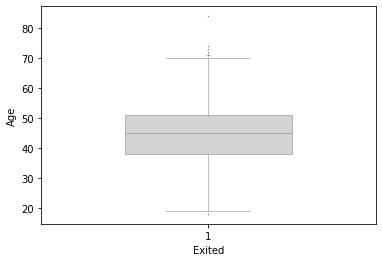

In [ ]:
sns.boxplot(
        data=df_age_exited
        , x='Exited'
        , y='Age'
        , fliersize=0.5
        , width = 0.5
        , linewidth=0.5
        , palette=sns.color_palette(['lightgrey']))

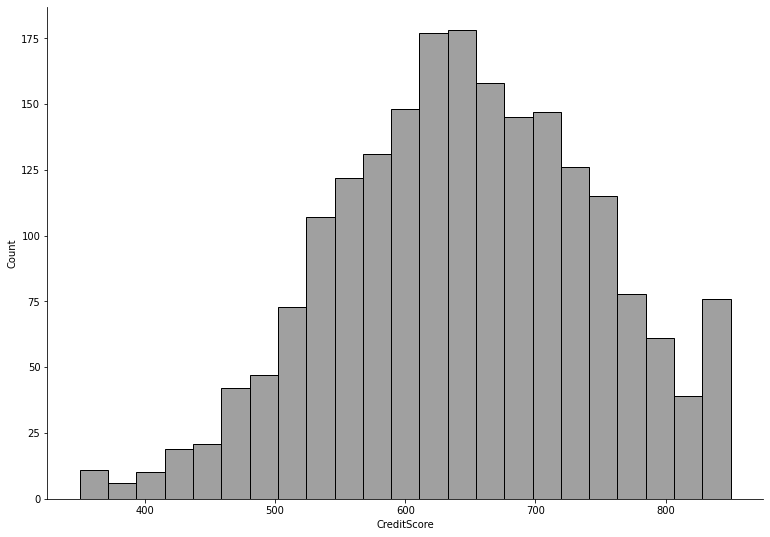

In [ ]:
sns.displot(data=df_creditscore_exited, x='CreditScore', color='grey').figure.set_size_inches(12, 8)

In [ ]:
sns.boxplot(
        data=df_creditscore_exited
        , x='Exited'
        , y='CreditScore'
        , fliersize=0.5
        , width = 0.5
        , linewidth=0.5
        , palette=sns.color_palette(['lightgrey']))

NameError: ignored

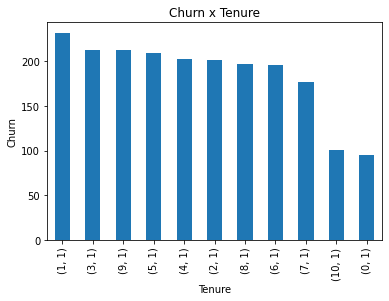

In [ ]:
df_tenure_exited.value_counts().plot(x='Tenure', title='Churn x Tenure',ylabel='Churn', xlabel='Tenure',kind='bar')


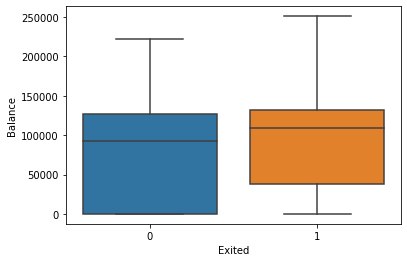

In [ ]:
sns.boxplot(data=df_churn, x='Exited', y='Balance')


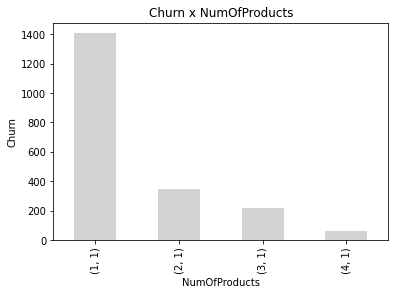

In [ ]:
df_numofproducts_exited.value_counts().plot(x='NumOfProducts', title='Churn x NumOfProducts',ylabel='Churn', xlabel='NumOfProducts', color='lightgrey', kind='bar')


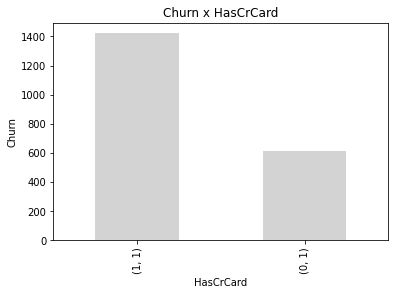

In [ ]:
df_hascrcard_exited.value_counts().plot(x='HasCrCard', title='Churn x HasCrCard',ylabel='Churn', xlabel='HasCrCard',color='lightgrey', kind='bar')


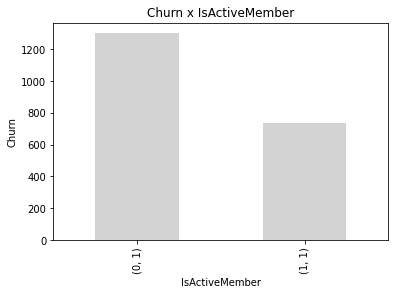

In [ ]:
df_isactivemember_exited.value_counts().plot(x='IsActiveMember', title='Churn x IsActiveMember',ylabel='Churn', xlabel='IsActiveMember', color='lightgrey', kind='bar')


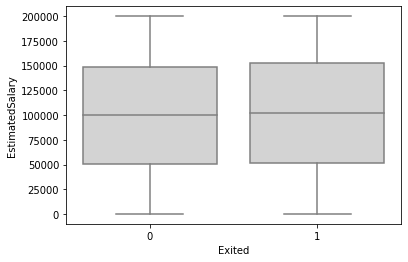

In [ ]:
sns.boxplot(data=df_churn, x='Exited', y='EstimatedSalary', color='lightgrey')

In [ ]:
# Transformando variável quantitativa em qualitativa (pesquisar método .cut())

#bins = [18, 30, 40, 50, 60, 70, 120]
#labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
#churn_df[AGE_GROUP] = pd.cut(churn_df[AGE], bins=bins, labels=labels, include_lowest=True)
#churn_df[AGE_GROUP].value_counts().sort_index().plot(kind="barh")

def faixa_idade(idade):
  if idade <= 32: return 'Jovem'
  if idade <= 44: return 'Adulto'
  return 'Idoso'

df_churn_quanti['age_quali'] = [faixa_idade(idade) for idade in df_churn_quanti.Age.to_list()]
df_churn_quanti

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,age_quali
RowNumber,,,,,,,,
1,619,42,2,0.00,1,101348.88,1,Adulto
2,608,41,1,83807.86,1,112542.58,0,Adulto
3,502,42,8,159660.80,3,113931.57,1,Adulto
4,699,39,1,0.00,2,93826.63,0,Adulto
5,850,43,2,125510.82,1,79084.10,0,Adulto
...,...,...,...,...,...,...,...,...
9996,771,39,5,0.00,2,96270.64,0,Adulto
9997,516,35,10,57369.61,1,101699.77,0,Adulto
9998,709,36,7,0.00,1,42085.58,1,Adulto


In [ ]:
df_agequali_exited = df_churn_quanti.loc[(df_churn_quanti.Exited == 1), ['age_quali', 'Exited']]

In [ ]:
df_agequali_exited.value_counts()

age_quali  Exited
Idoso      1         1044
Adulto     1          780
Jovem      1          213
dtype: int64

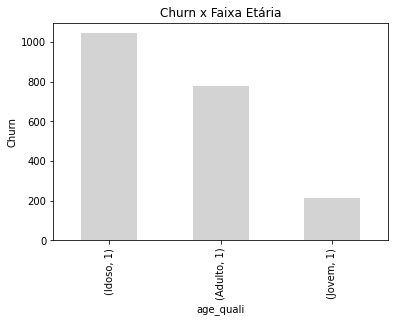

In [ ]:
df_agequali_exited.value_counts().plot(x='age_quali', title='Churn x Faixa Etária',ylabel='Churn', xlabel='age_quali', color='lightgrey', kind='bar')

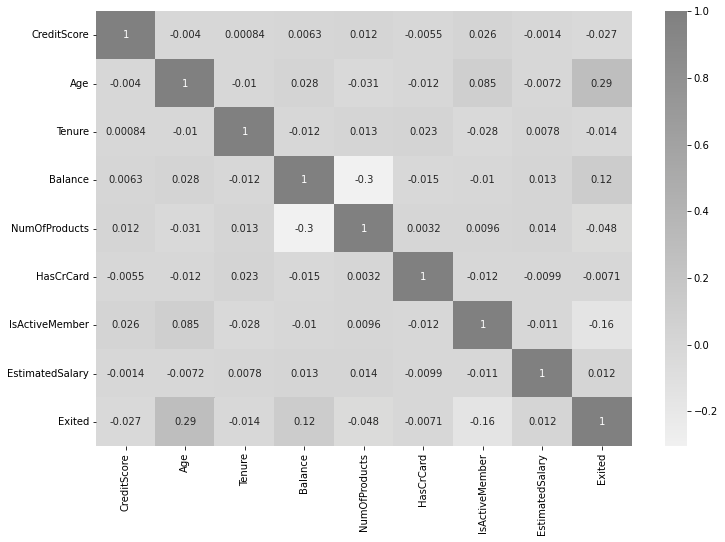

In [ ]:
corr_churn = df_churn.corr()
sns.heatmap(data=corr_churn, annot=True, linewidths=0, cmap=sns.color_palette("light:grey", as_cmap=True), cbar=True).figure.set_size_inches(12, 8)

[Text(0, 0.5, 'Counts_CustomerId'),
 Text(0.5, 0, 'HasCrCard'),
 Text(0.5, 1.0, 'CustomerId x HasCrCard')]

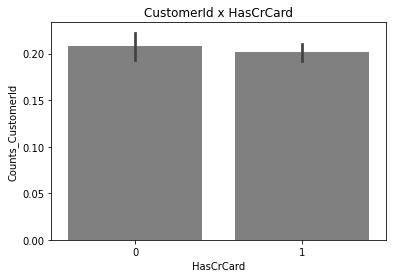

In [ ]:
sns.barplot(
    data=df_churn_quali, x='HasCrCard', y='Exited', color='grey').set(
            ylabel=('Counts_CustomerId'), xlabel=('HasCrCard'), title=('CustomerId x HasCrCard'))

AttributeError: ignored

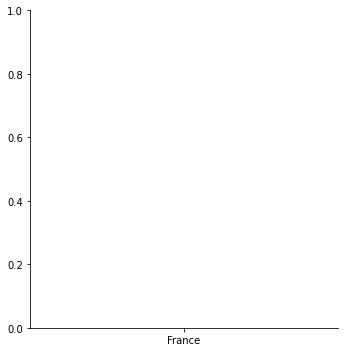

In [ ]:
sns.displot(
    data=df_geography_exited, x='Geography', color='lightgrey').despine(
        bottom=True, left=True, right=True, top=True).set(
            ylabel=('Counts_Churn'), xlabel=('Geography'), title=('Churn x Geography')).figure.set_size_inches(10, 6)